In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px 
import plotly.graph_objects as go
from scipy.signal import find_peaks

In [3]:
data = pd.read_csv('C:\\Users\\bagir\\Downloads\\2025-03-20_18-17-32_266_rcms.csv')

In [4]:
data

,TIME_s,RHEO_1_mΩ,BASE_1_Ω,ECG_V,RHEO_2_mΩ,BASE_2_Ω,QS_1_Ω,QS_2_Ω
0,0.000,-104.647,47.072,0.019,-3.897,30.988,1110.0,1110.0
1,0.005,-109.738,47.063,0.021,-3.115,30.988,1091.0,1091.0
2,0.010,-114.829,47.055,0.023,-2.332,30.988,1073.0,1073.0
3,0.015,-119.921,47.046,0.026,-1.550,30.988,1054.0,1054.0
4,0.020,-125.012,47.038,0.028,-0.767,30.989,1036.0,1036.0
...,...,...,...,...,...,...,...,...
388320,1941.600,95.003,43.775,-0.045,-6.905,25.066,1663.0,1663.0
388321,1941.605,95.575,43.775,-0.036,-6.345,25.066,1666.0,1666.0
388322,1941.610,96.147,43.776,-0.027,-5.785,25.066,1669.0,1669.0
388323,1941.615,96.719,43.776,-0.018,-5.225,25.066,1672.0,1672.0


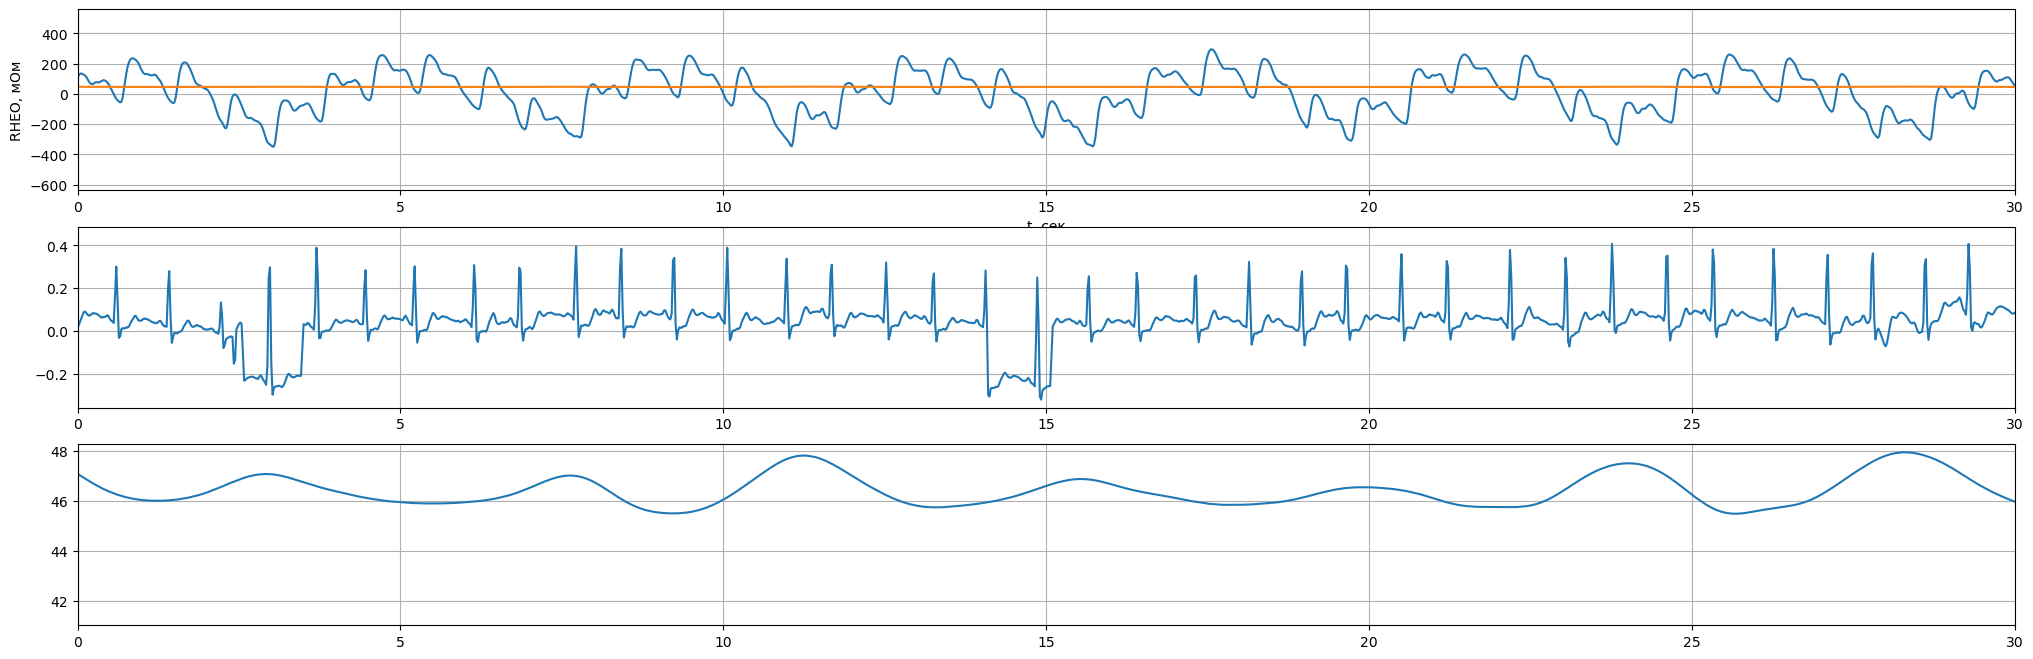

In [118]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(8)
left =0;
right=30;

#plt.plot(data.TIME_s, data.RHEO_1_mΩ, data.TIME_s, data.ECG_V)
plt.subplot(3, 1, 1)
plt.plot(data.TIME_s, -data.RHEO_1_mΩ, data.TIME_s, data.BASE_1_Ω)
plt.xlim([left, right])
plt.xlabel("t, сек")
plt.ylabel("RHEO, мОм")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(data.TIME_s, data.ECG_V)
plt.xlim([left, right])
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(data.TIME_s, data.BASE_1_Ω)
plt.xlim([left, right])
plt.grid(True)

In [121]:
#поиск частоты дыхания по базовому импедансу
R, _ =find_peaks(data.BASE_1_Ω)

array([   584,   1524,   2248,   3106,   3980,   4802,   5658,   6582,
         7200,   7614,   8554,   9502,  10348,  11316,  12284,  13162,
        13652,  14098,  15090,  16176,  17122,  17908,  18248,  19104,
        20044,  20990,  21898,  22820,  23857,  24832,  25566,  26012,
        26912,  27996,  29002,  29964,  30860,  31738,  32402,  32826,
        33866,  34836,  35932,  36894,  37888,  39010,  39822,  40820,
        41708,  42656,  43234,  43748,  44728,  45728,  46724,  47694,
        48594,  49592,  50528,  51370,  52338,  53261,  54430,  55344,
        56514,  57488,  58414,  59364,  60326,  61298,  62338,  63394,
        64437,  65202,  66008,  66666,  67092,  67432,  67624,  67962,
        68332,  68952,  69154,  69672,  70668,  70914,  71578,  72328,
        72708,  73402,  73830,  74818,  75913,  76954,  77980,  78862,
        79758,  80908,  81858,  82956,  83796,  84392,  84918,  85824,
        86928,  87912,  88942,  89468,  89890,  90790,  91460,  91876,
      

(0.0, 20000.0)

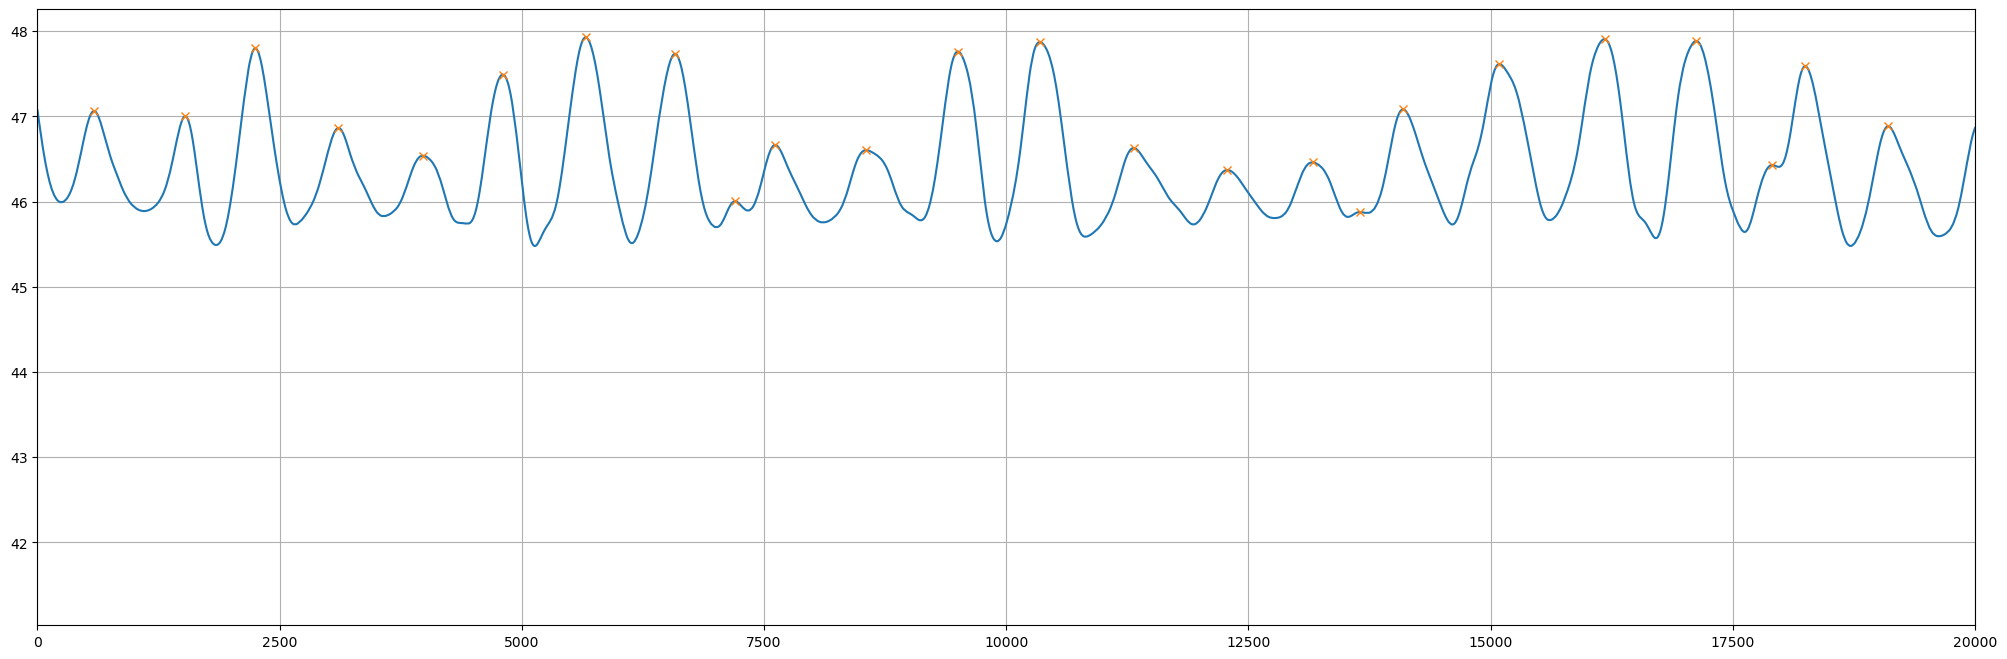

In [120]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(8)

plt.plot(data.BASE_1_Ω)
plt.plot(R, data.BASE_1_Ω[R], 'x')
#plt.plot(R, data.BASE_1_Ω[R], color='red')
plt.grid(True)

plt.xlim([0, 20000])


In [134]:
#расчет дастоты дыхания
a=len(R)/data.TIME_s[len(data.TIME_s)-1]
a

0.26421235875197

In [135]:
#Фильтрация сигнала
from scipy.signal import butter, filtfilt

In [155]:
#режекторный фильтр
def bandstop_filter(data, lowcut, highcut, fs, order):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='bandstop', analog=False)
    y = filtfilt(b, a, data)
    return y

In [156]:
# Параметры фильтра
fs = 1/data.TIME_s[1]  # Частота дискретизации
order = 3  # Порядок фильтра Баттерворта

(0.0, 55.0)

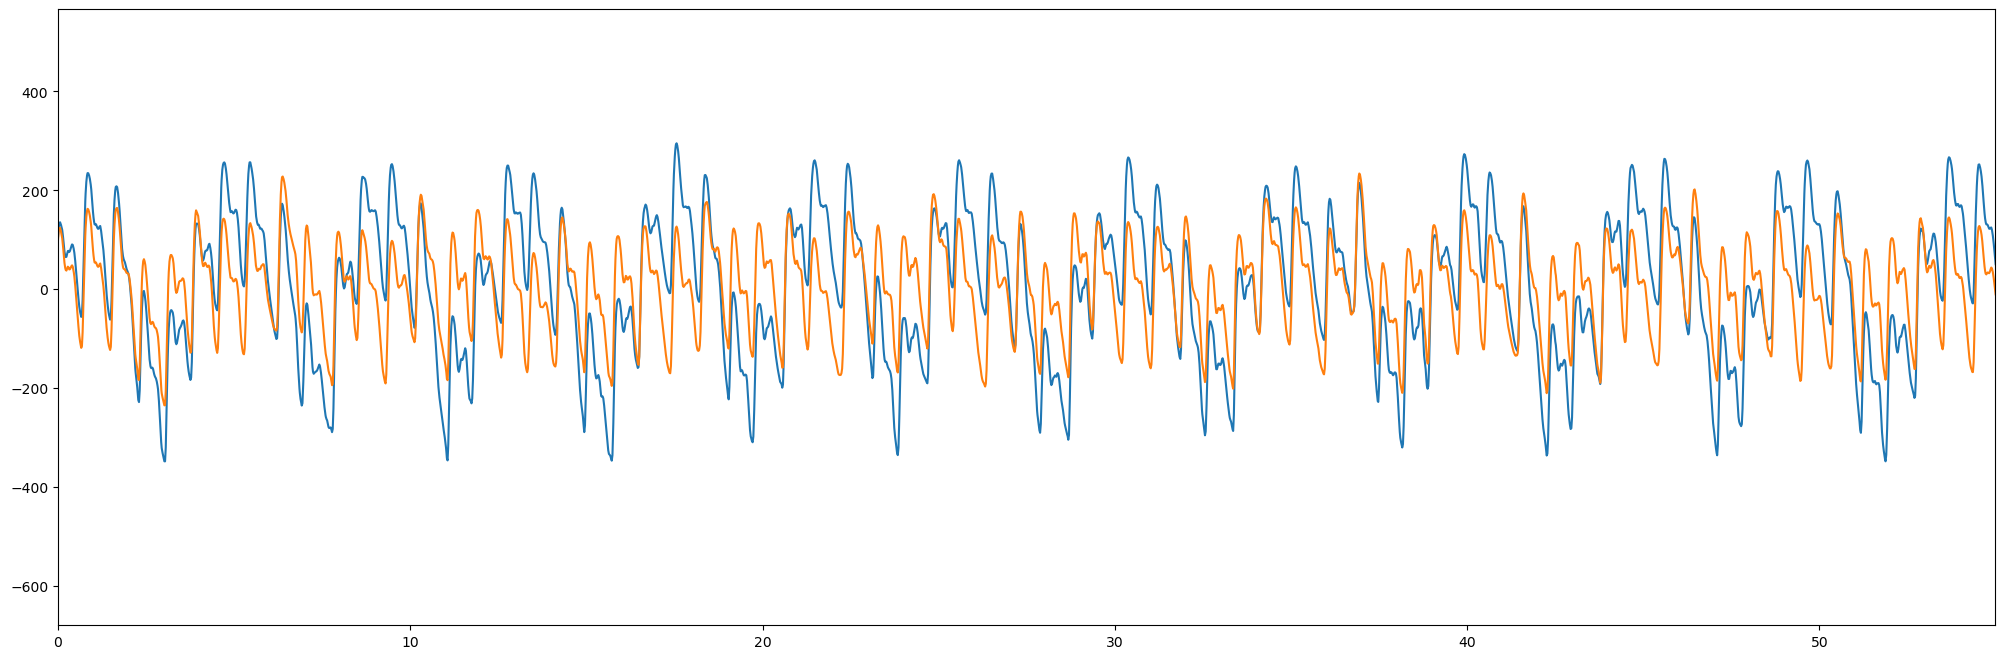

In [174]:
q=bandstop_filter(-data.RHEO_1_mΩ, a-0.06, a+0.06, fs, order)

f = plt.figure()
f.set_figwidth(25)
f.set_figheight(8)

plt.plot(data.TIME_s, -data.RHEO_1_mΩ, data.TIME_s, q)
#plt.plot(q)
plt.xlim([left, 55])